# ngVLA workshop 2025 Mexico: Advanced Imaging with ALMA-DIP

Setup T4 (GPU) runtime (entorno de ejecución)

In [ ]:
### optional to save the files in your drive
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
## Define project directory
project_dir = "/content/drive/MyDrive/ngvla_advanced_imaging_workshopmx2025"
## Create project folder (if it does not exist)
!mkdir -p $project_dir
## Move into project folder
%cd $project_dir
## Clone the repository
#!git clone https://github.com/Miguel-Jaquez/ALMA_DIP.git
! git clone https://github.com/cosmosz5/ALMA_DIP.git
## Verify contents
!ls


Mounted at /content/drive
/content/drive/MyDrive/ngvla_advanced_imaging_workshopmx2025


In [ ]:
### clone repository with the data and the ALMA-DIP
#! git clone https://github.com/Miguel-Jaquez/ALMA_DIP.git
! git clone https://github.com/cosmosz5/ALMA_DIP.git

fatal: destination path 'ALMA_DIP' already exists and is not an empty directory.


## run_alma_dip.py:

In [12]:
## import python libraries
import numpy as np
## import ALMA-DIP module
from ALMA_DIP.alma_dip import DIPConfig, reconstruct_dip, pick_device

## Load your data (u, v, Re, Im, weight):
data = np.loadtxt("./ALMA_DIP/DiscoMisterioso.txt", skiprows=1)
uv = data[:, :2].astype(np.float32)
vis = data[:, 2:4].astype(np.float32)
w   = data[:, 4].astype(np.float32)

## configuration DIP nn
cfg = DIPConfig(
    num_iters=1000,           # training epochs
    tv_weight=1e-2,           # lambda_TV == regularizer weight
    cell_size_arcsec=0.0075,  # cell size of image
    nu=3.0,                   # FIX: degrees of freedom
    learn_sigma=False,        # FIX: learn scale
)

## final image properties
## "mps": mac GPU / "cuda": nvidia GPU / "cpu": NO GPU (very slow)
device = str(pick_device("cuda"))  # name device
image, dirty, beam = reconstruct_dip(
    uv=uv, vis=vis, weight=w,
    img_size=(540, 540),          # image size
    cfg=cfg,                      # read DIP configuration
    device=device                 # device to use
)

[    1/1000]  data(t)=55.556484  tv=758.422119
[  200/1000]  data(t)=8.844565  tv=5.821201
[  400/1000]  data(t)=8.829308  tv=5.821201
[  600/1000]  data(t)=7.629719  tv=5.821202
[  800/1000]  data(t)=4.276150  tv=5.821201
[ 1000/1000]  data(t)=3.156369  tv=5.821201


In [13]:
import astropy.io.fits as pyfits
pyfits.writeto('alma_dip_1e-2.fits', image, overwrite=True)

np.save("recon.npy", image)

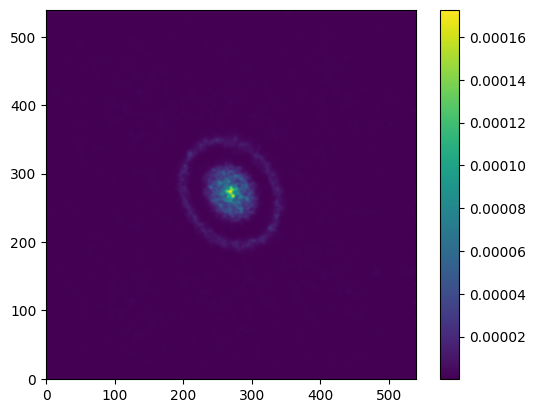

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
image_plot = pyfits.getdata("alma_dip_1e-2.fits")
plt.figure()
plt.imshow(image_plot, origin="lower")
plt.colorbar()
plt.show()
plt.savefig("alma_dip_1e-2.png")